In [232]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from tqdm import trange
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [233]:
sides = []
areas = []

for _ in trange(10000):
    side_length = random.uniform(1, 500)
    sides.append(int(side_length))
    areas.append(int(side_length**2))

split_index = int(0.8 * len(sides))

sides_train, areas_train = sides[:split_index], areas[:split_index]

sides_test, areas_test = sides[split_index:], areas[split_index:]

100%|██████████| 10000/10000 [00:00<00:00, 1640964.01it/s]


In [234]:
model = keras.Sequential([
    Dense(units=32, activation='relu', input_shape=(1,)),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae'])

In [235]:
epochs = 20
history = model.fit(sides_train, areas_train, epochs=epochs)

Epoch 1/20
250/250 [==============================] - 0s 395us/step - loss: 12335497216.0000 - mae: 82496.8203
Epoch 2/20
250/250 [==============================] - 0s 344us/step - loss: 12139172864.0000 - mae: 81701.2578
Epoch 3/20
250/250 [==============================] - 0s 383us/step - loss: 11757655040.0000 - mae: 80134.4766
Epoch 4/20
250/250 [==============================] - 0s 358us/step - loss: 11168787456.0000 - mae: 77673.9844
Epoch 5/20
250/250 [==============================] - 0s 357us/step - loss: 10385602560.0000 - mae: 74290.9141
Epoch 6/20
250/250 [==============================] - 0s 344us/step - loss: 9471764480.0000 - mae: 70218.0000
Epoch 7/20
250/250 [==============================] - 0s 345us/step - loss: 8485338624.0000 - mae: 65632.4531
Epoch 8/20
250/250 [==============================] - 0s 341us/step - loss: 7472417280.0000 - mae: 60722.4297
Epoch 9/20
250/250 [==============================] - 0s 349us/step - loss: 6468682240.0000 - mae: 55659.7148
Epoch

In [236]:
model.evaluate(sides_test, areas_test, verbose=2)

63/63 - 0s - loss: 851954176.0000 - mae: 24582.9727 - 70ms/epoch - 1ms/step


[851954176.0, 24582.97265625]

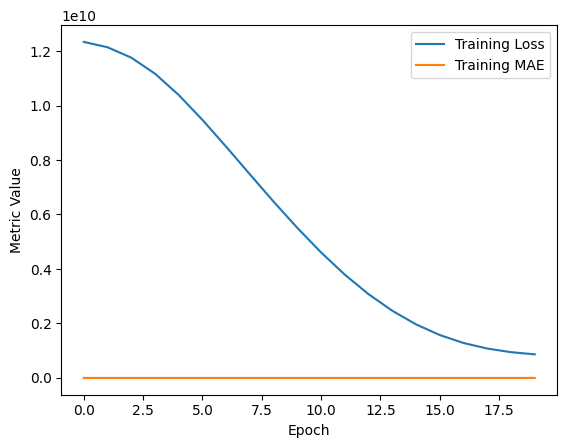

In [237]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['mae'], label='Training MAE')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

In [238]:
num = 20
test_side_length = [num]
predicted_area = model.predict(test_side_length)
print(f'Predicted Area for Side Length {num}: {predicted_area[0][0]:.4f}')

1/1 [==============================] - 0s 33ms/step
Predicted Area for Side Length 20: 7274.8711
